# 梯度下降法(Gradient Descent)

## 範例1. 假定目標函數 f(x) = $x^2$，而非MSE，請使用梯度下降法求取最小值

In [1]:
# 載入套件
import numpy as np
import matplotlib.pyplot as plt

# 目標函數(損失函數):y=x^2
def func(x): return x ** 2 #np.square(x)

# 目標函數的一階導數:dy/dx=2*x
def dfunc(x): return 2 * x

In [2]:
# 梯度下降
# x_start: x的起始點
# df: 目標函數的一階導數
# epochs: 執行週期
# lr: 學習率
def GD(x_start, df, epochs, lr):    
    xs = np.zeros(epochs+1)    
    x = x_start    
    xs[0] = x    
    for i in range(epochs):         
        dx = df(x)        
        # x更新 x_new = x — learning_rate * gradient        
        x += - dx * lr         
        xs[i+1] = x    
    return xs

## 梯度下降法(Gradient Descent)示意圖

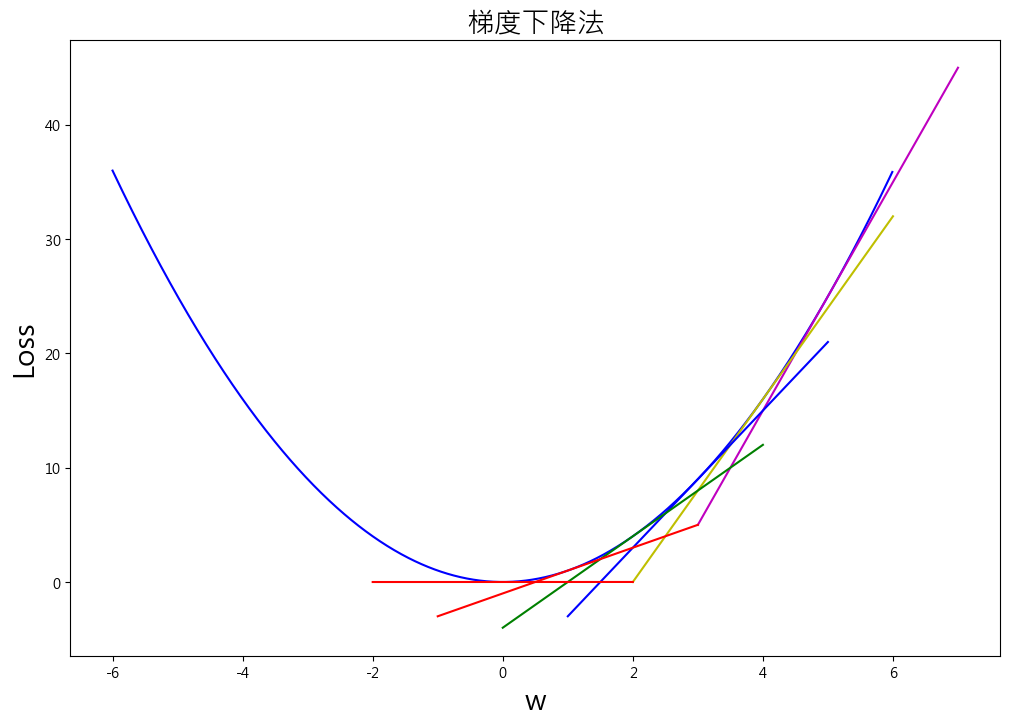

In [3]:
# 超參數(Hyperparameters)
x_start = 5     # 起始權重
epochs = 15     # 執行週期數 
lr = 0.3        # 學習率 

# 梯度下降法 
# *** Function 可以直接當參數傳遞 ***
w = GD(x_start, dfunc, epochs, lr=lr) 

color = 'r'    

plt.figure(figsize=(12,8))
t = np.arange(-6.0, 6.0, 0.01)
plt.plot(t, func(t), c='b')

# 設定中文字型
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
# 矯正負號
plt.rcParams['axes.unicode_minus'] = False

plt.title('梯度下降法', fontsize=20)
plt.xlabel('w', fontsize=20)
plt.ylabel('Loss', fontsize=20)

color = list('rgbymr')  # 切線顏色   
line_offset=2           #切線長度
for i in range(5, -1, -1):
    # 取相近兩個點，畫切線(tangent line)
    z=np.array([i+0.001, i])
    vec=np.vectorize(func)
    cls = np.polyfit(z, vec(z), deg=1)
    p = np.poly1d(cls)
    
    # 畫切線
    x=np.array([i+line_offset, i-line_offset])
    y=np.array([(i+line_offset)*p[1]+p[0], (i-line_offset)*p[1]+p[0]])
    plt.plot(x, y, c=color[i-1])    

plt.show()

## 執行梯度下降法(Gradient Descent)

[-5.   -2.   -0.8  -0.32 -0.13 -0.05 -0.02 -0.01 -0.   -0.   -0.   -0.
 -0.   -0.   -0.   -0.  ]


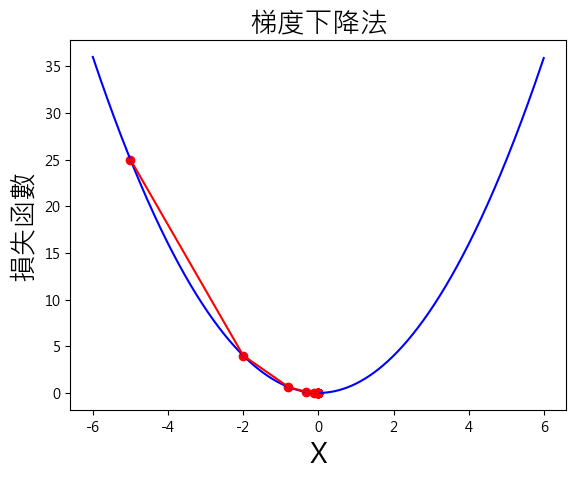

In [4]:
# 超參數(Hyperparameters)
x_start = -5     # 起始權重
epochs = 15     # 執行週期數 
lr = 0.3        # 學習率 

# 梯度下降法 
# *** Function 可以直接當參數傳遞 ***
w = GD(x_start, dfunc, epochs, lr=lr) 
print (np.around(w, 2))

color = 'r'    
from numpy import arange
t = arange(-6.0, 6.0, 0.01)
plt.plot(t, func(t), c='b')
plt.plot(w, func(w), c=color, label='lr={}'.format(lr))    
plt.scatter(w, func(w), c=color, ) 

# 設定中文字型
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
# 矯正負號
plt.rcParams['axes.unicode_minus'] = False

plt.title('梯度下降法', fontsize=20)
plt.xlabel('X', fontsize=20)
plt.ylabel('損失函數', fontsize=20)
plt.show()

## 範例2. 假定損失函數如下，請使用梯度下降法求取最小值
$2x^4-3x-20$

In [5]:
# 損失函數
def func(x): return 2*x**4-3*x+2*x-20

# 損失函數一階導數
def dfunc(x): return 8*x**3-6*x+2

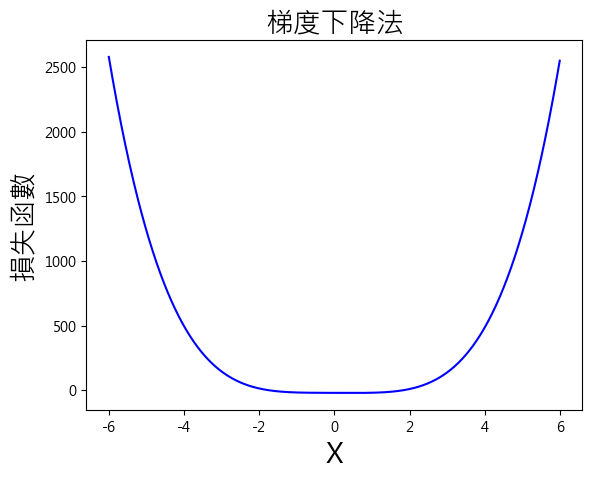

In [6]:
from numpy import arange
t = arange(-6.0, 6.0, 0.01)
plt.plot(t, func(t), c='b')

# 設定中文字型
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
# 矯正負號
plt.rcParams['axes.unicode_minus'] = False

plt.title('梯度下降法', fontsize=20)
plt.xlabel('X', fontsize=20)
plt.ylabel('損失函數', fontsize=20)
plt.show()

## 執行梯度下降法(Gradient Descent)

[5.   4.03 3.53 ... 0.5  0.5  0.5 ]


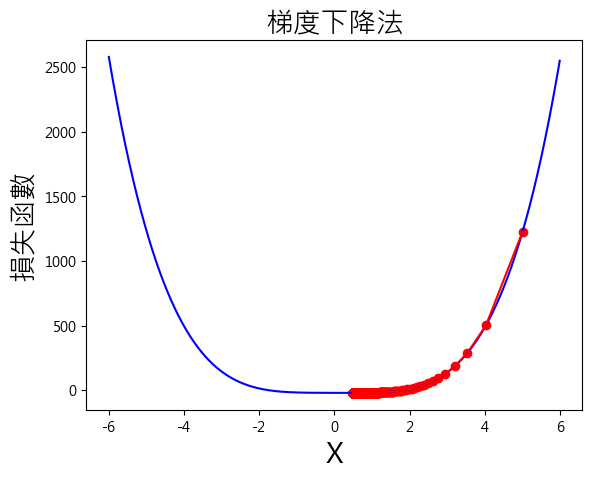

In [7]:
# 超參數(Hyperparameters)
x_start = 5     # 起始權重
epochs = 150000  # 執行週期數 
lr = 0.001      # 學習率 

# 梯度下降法 
# *** Function 可以直接當參數傳遞 ***
w = GD(x_start, dfunc, epochs, lr=lr) 
print (np.around(w, 2))

color = 'r'    
from numpy import arange
t = arange(-6.0, 6.0, 0.01)
plt.plot(t, func(t), c='b')
plt.plot(w, func(w), c=color, label='lr={}'.format(lr))    
plt.scatter(w, func(w), c=color, ) 

# 設定中文字型
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
# 矯正負號
plt.rcParams['axes.unicode_minus'] = False

plt.title('梯度下降法', fontsize=20)
plt.xlabel('X', fontsize=20)
plt.ylabel('損失函數', fontsize=20)
plt.show()

In [8]:
func(0.5)

-20.375

## 使用 SciPy leastsq

In [17]:
from scipy.optimize import leastsq

# 最小平方法
def func(x): return 2*x**4-3*x+2*x-20
leastsq(func, 5, full_output=True) 

(array([1.81736891]),
 array([[0.00045231]]),
 {'fvec': array([1.42108547e-14]),
  'nfev': 17,
  'fjac': array([[-47.01968293]]),
  'ipvt': array([0], dtype=int32),
  'qtf': array([-4.80690783e-07])},
 'The relative error between two consecutive iterates is at most 0.000000',
 2)

In [18]:
def func(x): return 2*(x**4)-3*x+2*x-20
leastsq(func, 1, full_output=True)

(array([1.81736891]),
 array([[0.00045231]]),
 {'fvec': array([-3.55271368e-15]),
  'nfev': 16,
  'fjac': array([[-47.01968215]]),
  'ipvt': array([0], dtype=int32),
  'qtf': array([-2.06057393e-13])},
 'The relative error between two consecutive iterates is at most 0.000000',
 2)

In [16]:
func(1.81736891)

-1.2851633357513492e-07